# PoPs: Polygenic Priority Score

They applied different sources of data to represent gene features, including:

* Gene-level z scores from GWAS summary statistics 

* Gene expression data, biological pathways, and predicted PPI networks 

Then they narrowed down features by 

* marginal feature selection 

* generalized least squares (GLS) with a leave one chromosome out (LOCO) framework.

They believe they incorporate both locus-based and similarity-based methods.

> /mnt/c/Users/dell/Desktop/Screenshot 2021-07-07 082053.png (64.2 KiB):

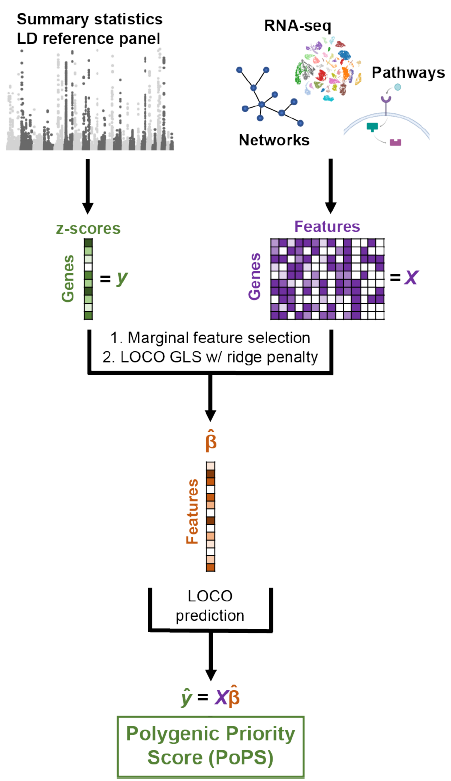

In [5]:
%preview '/mnt/c/Users/dell/Desktop/Screenshot 2021-07-07 082053.png'

### [Workflow](https://github.com/FinucaneLab/gene_features)

* Read in, QC, filter, scale, and normalize data

* Perform PCA and independent component analysis (ICA) across all cells or meta-cells or tissues

* Perform clustering and UMAP and plot features on projection

* Perform differential expression analysis

> [Weeks, E. M., Ulirsch, J. C., Cheng, N. Y., Trippe, B. L., Fine, R. S., Miao, J., ... & Finucane, H. K. (2020). Leveraging polygenic enrichments of gene features to predict genes underlying complex traits and diseases. medRxiv.](https://doi.org/10.1101/2020.09.08.20190561)

# Relicate work of PoPs

### Installing

In [1]:
# Install all the things
if (!require("devtools")) {install.packages("devtools")}
library(devtools)
if (!require("tidyverse")) {install.packages("tidyverse")}
if (!require("data.table")) {install.packages("data.table")}
if (!require("Matrix")) {install.packages("Matrix")}
if (!require("irlba")) {install.packages("irlba")}
if (!require("Seurat")) {install.packages("Seurat")}
if (!require("MUDAN")) {devtools::install_github("JEFworks/MUDAN")}
if (!require("BuenColors")) {devtools::install_github("caleblareau/BuenColors")}

Loading required package: devtools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘devtools’”
also installing the dependencies ‘askpass’, ‘credentials’, ‘sys’, ‘zip’, ‘gitcreds’, ‘ini’, ‘fastmap’, ‘highr’, ‘markdown’, ‘xfun’, ‘diffobj’, ‘rematch2’, ‘clipr’, ‘curl’, ‘gert’, ‘gh’, ‘rappdirs’, ‘rprojroot’, ‘whisker’, ‘processx’, ‘mime’, ‘openssl’, ‘cachem’, ‘prettyunits’, ‘xopen’, ‘brew’, ‘commonmark’, ‘knitr’, ‘xml2’, ‘brio’, ‘praise’, ‘ps’, ‘waldo’, ‘usethis’, ‘callr’, ‘desc’, ‘fs’, ‘httr’, ‘memoise’, ‘pkgbuild’, ‘pkgload’, ‘rcmdcheck’, ‘remotes’, ‘roxygen2’, ‘rstudioapi’, ‘rversions’, ‘sessioninfo’, ‘testthat’, ‘withr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: usethis

Loading required package: tidyverse

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘t

locfit       (NA -> 1.5-9.4 ) [CRAN]
limma        (NA -> 3.46.0  ) [CRAN]
formatR      (NA -> 1.11    ) [CRAN]
futile.op... (NA -> 1.0.1   ) [CRAN]
lambda.r     (NA -> 1.2.4   ) [CRAN]
snow         (NA -> 0.4-3   ) [CRAN]
futile.lo... (NA -> 1.4.3   ) [CRAN]
bit          (NA -> 4.0.4   ) [CRAN]
plogr        (NA -> 0.2.0   ) [CRAN]
bit64        (NA -> 4.0.5   ) [CRAN]
S4Vectors    (NA -> 0.28.1  ) [CRAN]
RSQLite      (NA -> 2.2.7   ) [CRAN]
IRanges      (NA -> 2.24.1  ) [CRAN]
XML          (NA -> 3.99-0.6) [CRAN]
Biobase      (NA -> 2.50.0  ) [CRAN]
annotate     (NA -> 1.68.0  ) [CRAN]
Annotatio... (NA -> 1.52.0  ) [CRAN]
BiocGenerics (NA -> 0.36.1  ) [CRAN]
edgeR        (NA -> 3.32.1  ) [CRAN]
BiocParallel (NA -> 1.24.1  ) [CRAN]
genefilter   (NA -> 1.72.1  ) [CRAN]
entropy      (NA -> 1.3.0   ) [CRAN]
sva          (NA -> 3.38.0  ) [CRAN]


Installing 23 packages: locfit, limma, formatR, futile.options, lambda.r, snow, futile.logger, bit, plogr, bit64, S4Vectors, RSQLite, IRanges, XML, Biobase, annotate, AnnotationDbi, BiocGenerics, edgeR, BiocParallel, genefilter, entropy, sva

Warning message in i.p(...):
“installation of package ‘RSQLite’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘AnnotationDbi’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘annotate’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘genefilter’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘sva’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



✔  checking for file ‘/tmp/RtmpseBm4y/remotes9c546eabd8/JEFworks-MUDAN-3636ed2/DESCRIPTION’
─  preparing ‘MUDAN’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘MUDAN_0.1.0.tar.gz’
   


Warning message in i.p(...):
“installation of package ‘/tmp/RtmpseBm4y/file9c53917cee2/MUDAN_0.1.0.tar.gz’ had non-zero exit status”
Loading required package: BuenColors

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘BuenColors’”




✔  checking for file ‘/tmp/RtmpseBm4y/remotes9c53742b629/caleblareau-BuenColors-f1bc8e6/DESCRIPTION’
─  preparing ‘BuenColors’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘BuenColors/figure’
─  building ‘BuenColors_0.5.6.tar.gz’
   


In [2]:
#install.packages('ggrastr')
install.packages('reticulate')
install.packages('future')
install.packages('tidytext')
install.packages('matrixTests')

also installing the dependencies ‘systemfonts’, ‘textshaping’, ‘Cairo’, ‘ragg’


Warning message in install.packages("ggrastr"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("ggrastr"):
“installation of package ‘Cairo’ had non-zero exit status”
Warning message in install.packages("ggrastr"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("ggrastr"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("ggrastr"):
“installation of package ‘ggrastr’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘SnowballC’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’


Updating HTML index of packages in '.Lib

In [5]:
install.packages('R.utils')

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Intractable packages: ggrastr, Seurat, BuenColors

In [1]:
# Load libraries
library(tidyverse)
library(data.table)
library(BuenColors)
library(Seurat)
library(irlba)
library(Matrix)
library(future)
library(reticulate)
library(ggrastr)
library(tidytext)
library(matrixTests)
source("utils.R")

# Set up parallelization
# Remember to use htop to delete forgotten forks
Sys.setenv(R_FUTURE_FORK_ENABLE = T)
options(future.globals.maxSize = 6 * 2048 * 1024^2)
plan(strategy = "multicore", workers = 32)

# Parameters
name <- "human_airway"
number_pcs <- 35
vargenes <- 1500
clus_res <- 0.6

# Setup
dir.create(paste0("../plots/", name))
dir.create(paste0("../features/", name))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: MASS


Attaching package: ‘MASS’


T

In [2]:
# data read in. It takes too long so I reduce the data size to 10000*10000.
file <- paste0("../data/", name, "/Raw_exprMatrix.tsv.gz")
mat <- data.frame(fread(file), row.names=1)[1:10000,1:10000] %>% 
  data.matrix() %>%
  Matrix(sparse = TRUE)

In [4]:

file <- paste0("../data/", name, "/meta.tsv")
mat.annot <- data.frame(fread(file), row.names=1, header=T)
colnames(mat) <-  gsub("[.]", "-", colnames(mat))

# Convert to ENSG, drop duplicates, and fill in missing genes
mat <- ConvertToENSGAndProcessMatrix(mat, "human_symbol")

# Load this in in case we need it later
keep <- read.table("../resources/gene_annot_jun10.txt", sep = "\t", header = T, stringsAsFactors = F, col.names = c("ENSG", "symbol", "chr", "start", "end", "TSS"))

Warning message in CreateSeuratObject.default(counts = mat, project = name, min.features = 200, :
“Some cells in meta.data not present in provided counts matrix”
Centering and scaling data matrix

Warning message:
“Removed 13345 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 13345 rows containing non-finite values (stat_bin).”
PC_ 1 
Positive:  ENSG00000196754, ENSG00000121552, ENSG00000175793, ENSG00000189334, ENSG00000188643, ENSG00000094963, ENSG00000042493, ENSG00000163273, ENSG00000164032, ENSG00000145247 
	   ENSG00000133710, ENSG00000142669, ENSG00000117632, ENSG00000114315, ENSG00000131795, ENSG00000162385, ENSG00000175416, ENSG00000132698, ENSG00000164120, ENSG00000145777 
	   ENSG00000152583, ENSG00000112902, ENSG00000123689, ENSG00000196154, ENSG00000163220, ENSG00000145824, ENSG00000126067, ENSG00000168894, ENSG00000114115, ENSG00000177556 
Negative:  ENSG00000179902, ENSG00000215217, ENSG00000152611, ENSG00000186973, ENSG00000159588, ENSG000001739

PC_ 1 
Positive:  ENSG00000145741, ENSG00000196754, ENSG00000114942, ENSG00000144426, ENSG00000181163, ENSG00000065978, ENSG00000173660, ENSG00000169567, ENSG00000127184, ENSG00000187514 
	   ENSG00000163466, ENSG00000135821, ENSG00000154518, ENSG00000069849, ENSG00000118816, ENSG00000155366, ENSG00000184292, ENSG00000121552, ENSG00000074800, ENSG00000068697 
Negative:  ENSG00000179902, ENSG00000215217, ENSG00000152611, ENSG00000186973, ENSG00000159588, ENSG00000173947, ENSG00000203985, ENSG00000145075, ENSG00000178965, ENSG00000174844 
	   ENSG00000155761, ENSG00000197057, ENSG00000153347, ENSG00000004838, ENSG00000039139, ENSG00000188817, ENSG00000118997, ENSG00000152763, ENSG00000181378, ENSG00000163879 
PC_ 2 
Positive:  ENSG00000196754, ENSG00000163191, ENSG00000184292, ENSG00000127184, ENSG00000121552, ENSG00000189334, ENSG00000135821, ENSG00000169567, ENSG00000154518, ENSG00000117450 
	   ENSG00000163041, ENSG00000135940, ENSG00000197956, ENSG00000163435, ENSG00000146066, ENSG00

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


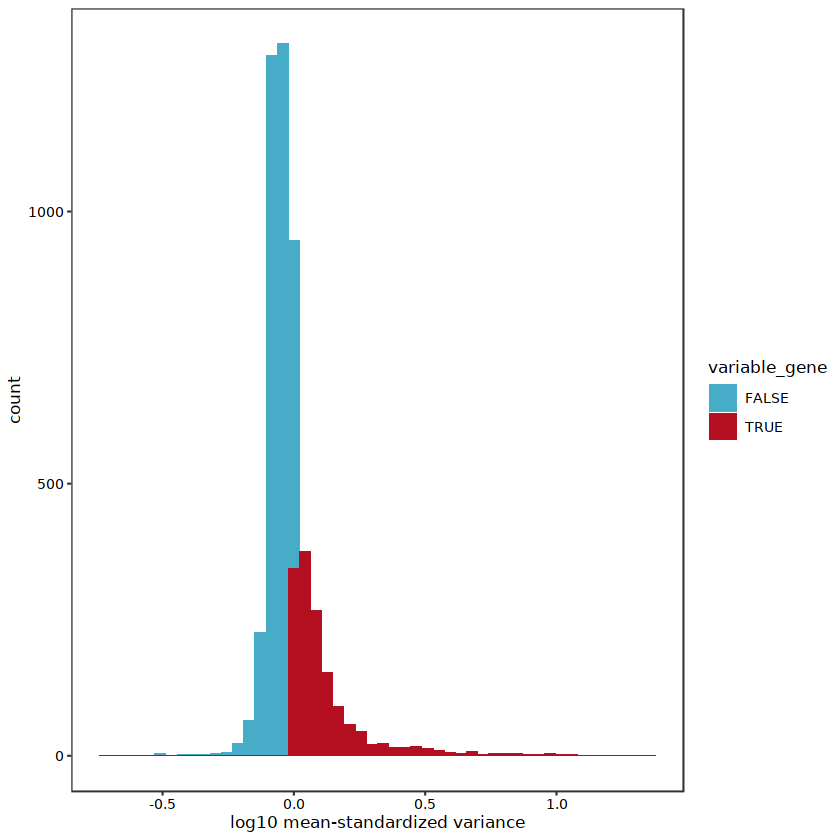

IC_ 1 
Positive:  ENSG00000196754, ENSG00000121552, ENSG00000189334, ENSG00000175793, ENSG00000094963, ENSG00000188643, ENSG00000042493, ENSG00000152583, ENSG00000164032, ENSG00000131795 
	   ENSG00000196776, ENSG00000157916, ENSG00000164171, ENSG00000163273, ENSG00000132698, ENSG00000145247, ENSG00000142669, ENSG00000163739, ENSG00000204219, ENSG00000133710 
	   ENSG00000196154, ENSG00000198643, ENSG00000197530, ENSG00000134248, ENSG00000114315, ENSG00000114638, ENSG00000163032, ENSG00000168894, ENSG00000162385, ENSG00000114115 
Negative:  ENSG00000179902, ENSG00000145075, ENSG00000155761, ENSG00000159588, ENSG00000203985, ENSG00000153347, ENSG00000174844, ENSG00000197057, ENSG00000186973, ENSG00000178965 
	   ENSG00000215217, ENSG00000118997, ENSG00000039139, ENSG00000142621, ENSG00000004838, ENSG00000152611, ENSG00000189350, ENSG00000163075, ENSG00000181378, ENSG00000176601 
	   ENSG00000173947, ENSG00000206530, ENSG00000243710, ENSG00000154479, ENSG00000183833, ENSG00000185860, ENS

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4969
Number of edges: 237406

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.8883
Number of communities: 14
Elapsed time: 4 seconds


Warning message:
“UNRELIABLE VALUE: Future (‘future_lapply-1’) unexpectedly generated random numbers without specifying argument 'future.seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed=NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:07:33 UMAP embedding parameters a = 0.3142 b = 1.003

14:07:33 Read 4969 rows and found 35 numeric columns

14:07:34 Using Annoy for neighbor search, n_neighbors = 10

14:07:34 Building Annoy index with metric = cosine,

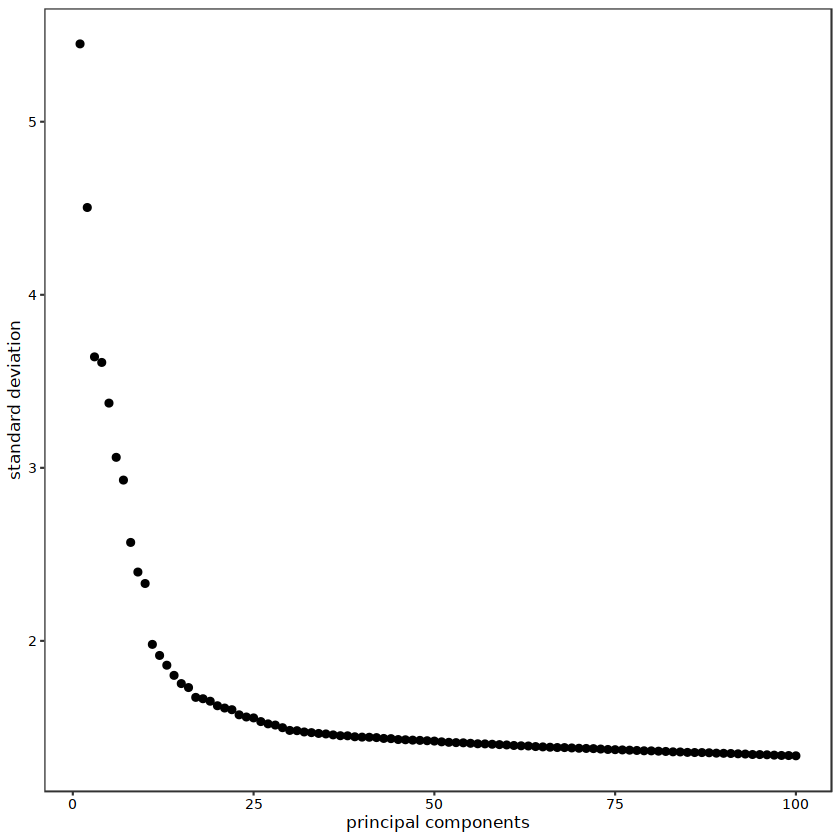

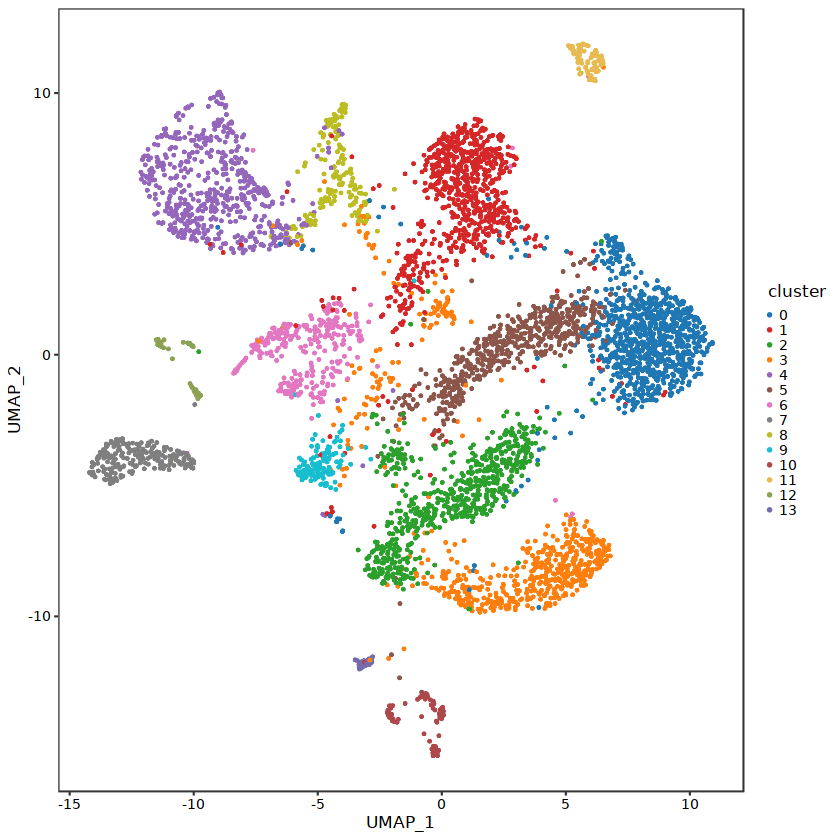

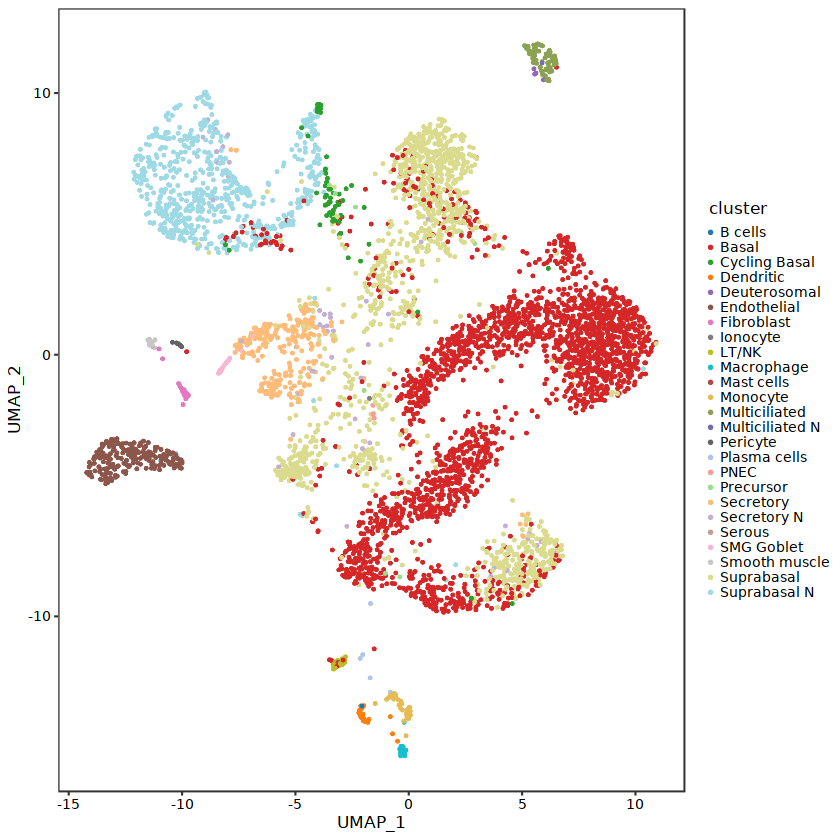

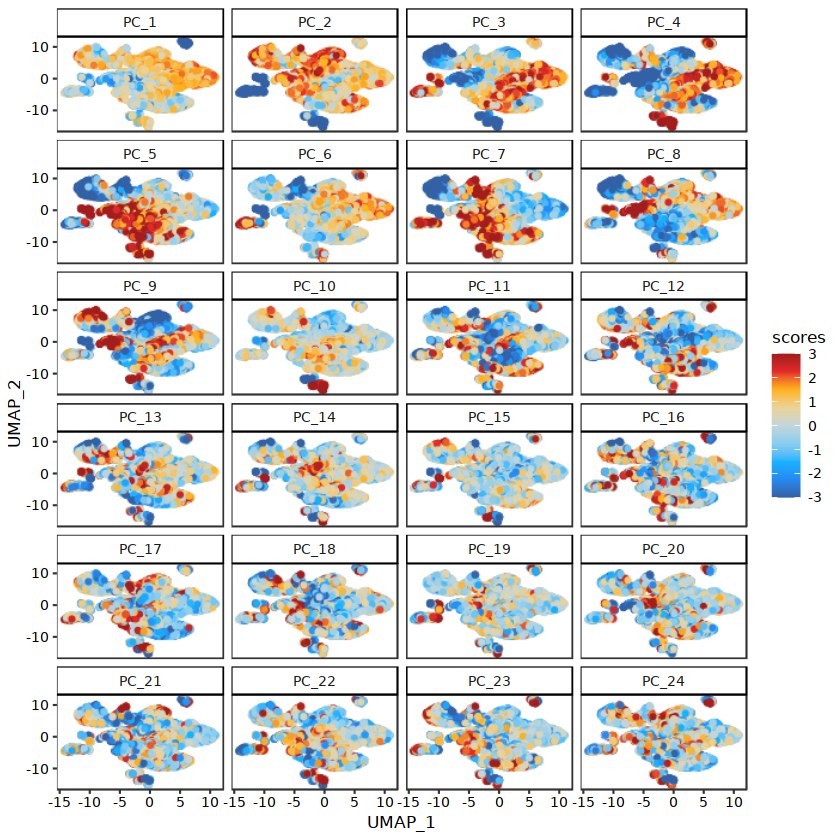

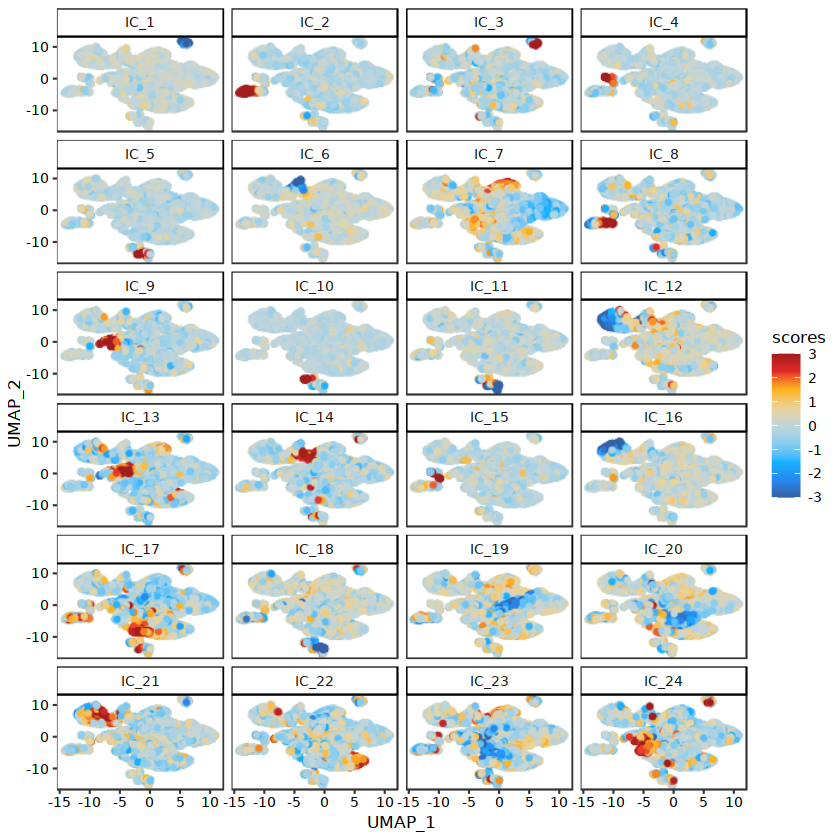

[1] 1


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 2


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 3


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 4


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 5


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 6


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 7


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 8


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 9


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 10


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 11


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 12


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 13


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”


[1] 14


Warning message:
“row_t_welch: 13345 of the rows were essentially constant.
First occurrence at row 1”
Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 235 features requested have zero variance (running reduction without them): ENSG00000163209, ENSG00000169469, ENSG00000163017, ENSG00000169474, ENSG00000019169, ENSG00000169442, ENSG00000143536, ENSG00000115523, ENSG00000172005, ENSG00000143556, ENSG00000241794, ENSG00000116824, ENSG00000132465, ENSG00000090104, ENSG00000174844, ENSG00000145879, ENSG00000143196, ENSG00000203747, ENSG00000125538, ENSG00000158481, ENSG00000081237, ENSG00000163563, ENSG00000162511, ENSG00000137441, ENSG00000178965, ENSG00000145491, ENSG00000163431, ENSG00000168542, ENSG00000152253, ENSG00000188396, ENSG00000155761, ENSG00000170231, ENSG00000007908, ENSG00000136546, ENSG00000203985, ENSG00000249751, ENSG00000153347, ENSG00000162618, ENSG00000168329, ENSG00000142621, ENSG00000213085, ENSG00000203785, ENSG0000

PC_ 1 
Positive:  ENSG00000034510, ENSG00000117472, ENSG00000155368, ENSG00000198643, ENSG00000118640, ENSG00000189334, ENSG00000137975, ENSG00000121858, ENSG00000143774, ENSG00000114638 
	   ENSG00000094755, ENSG00000114115, ENSG00000163220, ENSG00000142973, ENSG00000019582, ENSG00000163435, ENSG00000269028, ENSG00000130770, ENSG00000163993, ENSG00000185499 
Negative:  ENSG00000196878, ENSG00000156976, ENSG00000115457, ENSG00000163273, ENSG00000164056, ENSG00000196344, ENSG00000115380, ENSG00000115641, ENSG00000120708, ENSG00000181163 
	   ENSG00000250722, ENSG00000118816, ENSG00000152518, ENSG00000158747, ENSG00000068697, ENSG00000117525, ENSG00000184584, ENSG00000144895, ENSG00000135821, ENSG00000115484 
PC_ 2 
Positive:  ENSG00000182749, ENSG00000168036, ENSG00000198625, ENSG00000143443, ENSG00000185038, ENSG00000010932, ENSG00000112902, ENSG00000197622, ENSG00000213639, ENSG00000168906 
	   ENSG00000070831, ENSG00000132326, ENSG00000169905, ENSG00000163328, ENSG00000184897, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 264 features requested have zero variance (running reduction without them): ENSG00000163209, ENSG00000159189, ENSG00000173369, ENSG00000169469, ENSG00000163017, ENSG00000173372, ENSG00000213088, ENSG00000169474, ENSG00000158869, ENSG00000019169, ENSG00000169442, ENSG00000143536, ENSG00000118785, ENSG00000179639, ENSG00000115523, ENSG00000172005, ENSG00000143556, ENSG00000179902, ENSG00000175084, ENSG00000145649, ENSG00000173947, ENSG00000132465, ENSG00000090104, ENSG00000158488, ENSG00000174844, ENSG00000145879, ENSG00000152611, ENSG00000138755, ENSG00000143196, ENSG00000125538, ENSG00000158481, ENSG00000081237, ENSG00000116031, ENSG00000162614, ENSG00000163563, ENSG00000162511, ENSG00000137441, ENSG00000178965, ENSG00000145491, ENSG00000169245, ENSG00000163431, ENSG00000115009, ENSG00000188396, ENSG00000162692, ENSG00000155761, ENSG00000170231, ENSG00000162998, ENSG00000087128, ENSG00000

PC_ 1 
Positive:  ENSG00000152518, ENSG00000197747, ENSG00000196878, ENSG00000164056, ENSG00000117525, ENSG00000133710, ENSG00000163273, ENSG00000115641, ENSG00000163453, ENSG00000120708 
	   ENSG00000117318, ENSG00000134363, ENSG00000145824, ENSG00000115380, ENSG00000123689, ENSG00000117632, ENSG00000188001, ENSG00000131389, ENSG00000143546, ENSG00000099260 
Negative:  ENSG00000164120, ENSG00000188290, ENSG00000094755, ENSG00000137975, ENSG00000143819, ENSG00000168309, ENSG00000142973, ENSG00000121552, ENSG00000155366, ENSG00000120742 
	   ENSG00000150540, ENSG00000090621, ENSG00000198643, ENSG00000162981, ENSG00000121858, ENSG00000117472, ENSG00000116016, ENSG00000114115, ENSG00000189334, ENSG00000184292 
PC_ 2 
Positive:  ENSG00000137975, ENSG00000187889, ENSG00000271043, ENSG00000188290, ENSG00000117507, ENSG00000142599, ENSG00000117643, ENSG00000145241, ENSG00000170017, ENSG00000094755 
	   ENSG00000198677, ENSG00000164171, ENSG00000116039, ENSG00000109654, ENSG00000134317, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 279 features requested have zero variance (running reduction without them): ENSG00000163209, ENSG00000159189, ENSG00000173369, ENSG00000169469, ENSG00000163017, ENSG00000173372, ENSG00000213088, ENSG00000169474, ENSG00000019169, ENSG00000169442, ENSG00000162896, ENSG00000143536, ENSG00000118785, ENSG00000143556, ENSG00000241794, ENSG00000175084, ENSG00000116824, ENSG00000145649, ENSG00000132465, ENSG00000090104, ENSG00000158488, ENSG00000109255, ENSG00000188817, ENSG00000174844, ENSG00000145879, ENSG00000152611, ENSG00000143196, ENSG00000203747, ENSG00000125538, ENSG00000158481, ENSG00000081237, ENSG00000116031, ENSG00000163563, ENSG00000137441, ENSG00000178965, ENSG00000145491, ENSG00000169245, ENSG00000066279, ENSG00000179914, ENSG00000004838, ENSG00000171848, ENSG00000115009, ENSG00000168542, ENSG00000163221, ENSG00000152253, ENSG00000138722, ENSG00000126549, ENSG00000087128, ENSG00000

PC_ 1 
Positive:  ENSG00000269028, ENSG00000271043, ENSG00000134709, ENSG00000162520, ENSG00000143443, ENSG00000113361, ENSG00000168036, ENSG00000131374, ENSG00000131732, ENSG00000086619 
	   ENSG00000144741, ENSG00000196878, ENSG00000178222, ENSG00000132321, ENSG00000163032, ENSG00000196104, ENSG00000003756, ENSG00000145675, ENSG00000163608, ENSG00000172493 
Negative:  ENSG00000034510, ENSG00000117450, ENSG00000233276, ENSG00000163041, ENSG00000164405, ENSG00000135940, ENSG00000143774, ENSG00000169020, ENSG00000152583, ENSG00000177556 
	   ENSG00000232112, ENSG00000188643, ENSG00000198643, ENSG00000145494, ENSG00000142669, ENSG00000117472, ENSG00000121552, ENSG00000189334, ENSG00000019582, ENSG00000131495 
PC_ 2 
Positive:  ENSG00000145675, ENSG00000164056, ENSG00000115457, ENSG00000168397, ENSG00000196878, ENSG00000134709, ENSG00000169567, ENSG00000145741, ENSG00000163041, ENSG00000115641 
	   ENSG00000178222, ENSG00000086619, ENSG00000144895, ENSG00000176771, ENSG00000196104, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 257 features requested have zero variance (running reduction without them): ENSG00000163209, ENSG00000169469, ENSG00000163017, ENSG00000173372, ENSG00000213088, ENSG00000169474, ENSG00000019169, ENSG00000143536, ENSG00000118785, ENSG00000179639, ENSG00000172005, ENSG00000179902, ENSG00000090104, ENSG00000158488, ENSG00000145879, ENSG00000152611, ENSG00000138755, ENSG00000143196, ENSG00000203747, ENSG00000125538, ENSG00000158481, ENSG00000116031, ENSG00000163563, ENSG00000137441, ENSG00000178965, ENSG00000145491, ENSG00000004838, ENSG00000163221, ENSG00000152253, ENSG00000138722, ENSG00000155761, ENSG00000162998, ENSG00000087128, ENSG00000136546, ENSG00000203985, ENSG00000249751, ENSG00000153347, ENSG00000163072, ENSG00000168329, ENSG00000113140, ENSG00000203785, ENSG00000181847, ENSG00000007001, ENSG00000158477, ENSG00000121807, ENSG00000115165, ENSG00000162706, ENSG00000171951, ENSG00000

PC_ 1 
Positive:  ENSG00000115457, ENSG00000118816, ENSG00000156976, ENSG00000065978, ENSG00000196878, ENSG00000152518, ENSG00000196344, ENSG00000109332, ENSG00000152082, ENSG00000160789 
	   ENSG00000117691, ENSG00000009307, ENSG00000115641, ENSG00000153113, ENSG00000164111, ENSG00000175416, ENSG00000143870, ENSG00000144895, ENSG00000158747, ENSG00000117523 
Negative:  ENSG00000138002, ENSG00000144749, ENSG00000163739, ENSG00000156990, ENSG00000174132, ENSG00000170571, ENSG00000116717, ENSG00000117472, ENSG00000143502, ENSG00000072182 
	   ENSG00000011009, ENSG00000143819, ENSG00000114554, ENSG00000189280, ENSG00000136720, ENSG00000144161, ENSG00000185104, ENSG00000117308, ENSG00000113441, ENSG00000160087 
PC_ 2 
Positive:  ENSG00000116521, ENSG00000162493, ENSG00000168275, ENSG00000133710, ENSG00000152904, ENSG00000079308, ENSG00000171135, ENSG00000144451, ENSG00000159685, ENSG00000155868 
	   ENSG00000114383, ENSG00000143811, ENSG00000145782, ENSG00000160124, ENSG00000113460, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 275 features requested have zero variance (running reduction without them): ENSG00000159189, ENSG00000173369, ENSG00000163017, ENSG00000173372, ENSG00000158869, ENSG00000019169, ENSG00000118785, ENSG00000115523, ENSG00000179902, ENSG00000012223, ENSG00000175084, ENSG00000116824, ENSG00000145649, ENSG00000090104, ENSG00000158488, ENSG00000174844, ENSG00000152611, ENSG00000143196, ENSG00000203747, ENSG00000215217, ENSG00000158481, ENSG00000081237, ENSG00000116031, ENSG00000163563, ENSG00000162511, ENSG00000137441, ENSG00000178965, ENSG00000145423, ENSG00000145491, ENSG00000169245, ENSG00000163431, ENSG00000171848, ENSG00000152253, ENSG00000138722, ENSG00000126549, ENSG00000162998, ENSG00000189409, ENSG00000007908, ENSG00000136546, ENSG00000163879, ENSG00000153347, ENSG00000115956, ENSG00000188931, ENSG00000168269, ENSG00000113088, ENSG00000181847, ENSG00000007001, ENSG00000158477, ENSG00000

PC_ 1 
Positive:  ENSG00000143546, ENSG00000163209, ENSG00000163220, ENSG00000169474, ENSG00000169469, ENSG00000109255, ENSG00000196154, ENSG00000163993, ENSG00000163221, ENSG00000143536 
	   ENSG00000118322, ENSG00000121552, ENSG00000188643, ENSG00000185499, ENSG00000155368, ENSG00000016602, ENSG00000118640, ENSG00000133710, ENSG00000241794, ENSG00000034510 
Negative:  ENSG00000187514, ENSG00000181163, ENSG00000144426, ENSG00000065978, ENSG00000156976, ENSG00000115457, ENSG00000155366, ENSG00000118816, ENSG00000196754, ENSG00000068697 
	   ENSG00000069275, ENSG00000178035, ENSG00000143933, ENSG00000250722, ENSG00000135821, ENSG00000164056, ENSG00000198830, ENSG00000196344, ENSG00000177733, ENSG00000196878 
PC_ 2 
Positive:  ENSG00000172005, ENSG00000163209, ENSG00000143536, ENSG00000185873, ENSG00000142623, ENSG00000241794, ENSG00000215853, ENSG00000163221, ENSG00000196352, ENSG00000087128 
	   ENSG00000143369, ENSG00000163993, ENSG00000136689, ENSG00000163898, ENSG00000171476, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 244 features requested have zero variance (running reduction without them): ENSG00000163209, ENSG00000169469, ENSG00000213088, ENSG00000169474, ENSG00000163993, ENSG00000019169, ENSG00000143536, ENSG00000118785, ENSG00000115523, ENSG00000143556, ENSG00000241794, ENSG00000090104, ENSG00000188817, ENSG00000145879, ENSG00000138755, ENSG00000143196, ENSG00000203747, ENSG00000125538, ENSG00000158481, ENSG00000116031, ENSG00000162614, ENSG00000163563, ENSG00000162511, ENSG00000137441, ENSG00000178965, ENSG00000039139, ENSG00000169245, ENSG00000066279, ENSG00000004838, ENSG00000163431, ENSG00000168542, ENSG00000163221, ENSG00000152253, ENSG00000188396, ENSG00000138722, ENSG00000155761, ENSG00000159588, ENSG00000126549, ENSG00000170231, ENSG00000162998, ENSG00000189409, ENSG00000007908, ENSG00000136546, ENSG00000168329, ENSG00000142621, ENSG00000213085, ENSG00000188931, ENSG00000203785, ENSG00000

PC_ 1 
Positive:  ENSG00000163273, ENSG00000115457, ENSG00000152518, ENSG00000196344, ENSG00000134201, ENSG00000109610, ENSG00000162493, ENSG00000116212, ENSG00000134363, ENSG00000154153 
	   ENSG00000211445, ENSG00000196878, ENSG00000086589, ENSG00000188001, ENSG00000156976, ENSG00000243943, ENSG00000250722, ENSG00000185129, ENSG00000113552, ENSG00000008324 
Negative:  ENSG00000034510, ENSG00000117472, ENSG00000189334, ENSG00000169020, ENSG00000198643, ENSG00000118640, ENSG00000163435, ENSG00000164405, ENSG00000155368, ENSG00000142973 
	   ENSG00000120742, ENSG00000269028, ENSG00000121552, ENSG00000114115, ENSG00000137975, ENSG00000177556, ENSG00000233276, ENSG00000121858, ENSG00000094755, ENSG00000163220 
PC_ 2 
Positive:  ENSG00000113583, ENSG00000163050, ENSG00000178222, ENSG00000163032, ENSG00000178567, ENSG00000085832, ENSG00000143740, ENSG00000135916, ENSG00000164031, ENSG00000134313 
	   ENSG00000057935, ENSG00000122482, ENSG00000109814, ENSG00000145734, ENSG00000143815, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 314 features requested have zero variance (running reduction without them): ENSG00000143546, ENSG00000159189, ENSG00000173369, ENSG00000169469, ENSG00000173372, ENSG00000213088, ENSG00000158869, ENSG00000019169, ENSG00000169442, ENSG00000143536, ENSG00000118785, ENSG00000115523, ENSG00000172005, ENSG00000143248, ENSG00000143556, ENSG00000179902, ENSG00000241794, ENSG00000119147, ENSG00000132465, ENSG00000143110, ENSG00000158488, ENSG00000145879, ENSG00000152611, ENSG00000138755, ENSG00000143196, ENSG00000203747, ENSG00000125538, ENSG00000081237, ENSG00000116031, ENSG00000163563, ENSG00000162511, ENSG00000137441, ENSG00000185873, ENSG00000115414, ENSG00000178965, ENSG00000169245, ENSG00000066279, ENSG00000163431, ENSG00000168542, ENSG00000163221, ENSG00000152253, ENSG00000162998, ENSG00000087128, ENSG00000007908, ENSG00000136546, ENSG00000249751, ENSG00000162618, ENSG00000168329, ENSG00000

PC_ 1 
Positive:  ENSG00000162896, ENSG00000163993, ENSG00000177300, ENSG00000135842, ENSG00000116299, ENSG00000073737, ENSG00000203697, ENSG00000047457, ENSG00000113231, ENSG00000198643 
	   ENSG00000162551, ENSG00000115648, ENSG00000183508, ENSG00000152669, ENSG00000117472, ENSG00000197520, ENSG00000179914, ENSG00000163683, ENSG00000076864, ENSG00000170017 
Negative:  ENSG00000196754, ENSG00000145741, ENSG00000069849, ENSG00000074800, ENSG00000135821, ENSG00000115457, ENSG00000173660, ENSG00000163466, ENSG00000181163, ENSG00000163331 
	   ENSG00000175793, ENSG00000196344, ENSG00000117450, ENSG00000197747, ENSG00000164056, ENSG00000196878, ENSG00000156976, ENSG00000163931, ENSG00000117289, ENSG00000144381 
PC_ 2 
Positive:  ENSG00000197520, ENSG00000177300, ENSG00000134240, ENSG00000198380, ENSG00000115648, ENSG00000143578, ENSG00000113231, ENSG00000064651, ENSG00000077232, ENSG00000076864 
	   ENSG00000116260, ENSG00000117308, ENSG00000160678, ENSG00000138028, ENSG00000007001, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 370 features requested have zero variance (running reduction without them): ENSG00000163209, ENSG00000143546, ENSG00000159189, ENSG00000173369, ENSG00000169469, ENSG00000163017, ENSG00000169474, ENSG00000019169, ENSG00000162896, ENSG00000143536, ENSG00000179639, ENSG00000172005, ENSG00000143248, ENSG00000143556, ENSG00000179902, ENSG00000241794, ENSG00000169429, ENSG00000116824, ENSG00000145649, ENSG00000186973, ENSG00000132465, ENSG00000090104, ENSG00000158488, ENSG00000144485, ENSG00000188817, ENSG00000174844, ENSG00000145879, ENSG00000152611, ENSG00000203747, ENSG00000125538, ENSG00000215217, ENSG00000158481, ENSG00000116031, ENSG00000162614, ENSG00000163563, ENSG00000137441, ENSG00000185873, ENSG00000178965, ENSG00000039139, ENSG00000136689, ENSG00000170498, ENSG00000066279, ENSG00000179914, ENSG00000004838, ENSG00000163431, ENSG00000171848, ENSG00000163221, ENSG00000163739, ENSG00000

PC_ 1 
Positive:  ENSG00000213088, ENSG00000249751, ENSG00000163072, ENSG00000164035, ENSG00000162618, ENSG00000169744, ENSG00000138722, ENSG00000163762, ENSG00000113594, ENSG00000174059 
	   ENSG00000151789, ENSG00000170891, ENSG00000174175, ENSG00000163453, ENSG00000117318, ENSG00000064989, ENSG00000131370, ENSG00000197245, ENSG00000066056, ENSG00000170989 
Negative:  ENSG00000196754, ENSG00000163191, ENSG00000127184, ENSG00000184292, ENSG00000135821, ENSG00000154518, ENSG00000121552, ENSG00000146066, ENSG00000163041, ENSG00000189334 
	   ENSG00000117450, ENSG00000163331, ENSG00000169567, ENSG00000118640, ENSG00000069849, ENSG00000197956, ENSG00000196344, ENSG00000163466, ENSG00000135940, ENSG00000215845 
PC_ 2 
Positive:  ENSG00000138722, ENSG00000174175, ENSG00000163520, ENSG00000213088, ENSG00000173210, ENSG00000112936, ENSG00000169744, ENSG00000177721, ENSG00000145708, ENSG00000162706 
	   ENSG00000163072, ENSG00000151789, ENSG00000038295, ENSG00000137960, ENSG00000162645, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 350 features requested have zero variance (running reduction without them): ENSG00000163209, ENSG00000159189, ENSG00000173369, ENSG00000163017, ENSG00000173372, ENSG00000213088, ENSG00000019169, ENSG00000169442, ENSG00000143536, ENSG00000118785, ENSG00000179639, ENSG00000115523, ENSG00000172005, ENSG00000175084, ENSG00000116824, ENSG00000170476, ENSG00000145649, ENSG00000132465, ENSG00000090104, ENSG00000158488, ENSG00000188817, ENSG00000145879, ENSG00000152611, ENSG00000143196, ENSG00000203747, ENSG00000125538, ENSG00000215217, ENSG00000158481, ENSG00000081237, ENSG00000116031, ENSG00000162614, ENSG00000163563, ENSG00000137441, ENSG00000185873, ENSG00000178965, ENSG00000145491, ENSG00000163431, ENSG00000168542, ENSG00000163221, ENSG00000188396, ENSG00000138722, ENSG00000155761, ENSG00000159588, ENSG00000126549, ENSG00000162998, ENSG00000189409, ENSG00000087128, ENSG00000007908, ENSG00000

PC_ 1 
Positive:  ENSG00000135821, ENSG00000156976, ENSG00000184292, ENSG00000116209, ENSG00000196344, ENSG00000250722, ENSG00000120742, ENSG00000117289, ENSG00000117525, ENSG00000068697 
	   ENSG00000164056, ENSG00000118816, ENSG00000198643, ENSG00000144895, ENSG00000196878, ENSG00000121552, ENSG00000116016, ENSG00000117472, ENSG00000008952, ENSG00000115380 
Negative:  ENSG00000143228, ENSG00000066279, ENSG00000117724, ENSG00000152253, ENSG00000138778, ENSG00000129810, ENSG00000171848, ENSG00000164611, ENSG00000145386, ENSG00000164104 
	   ENSG00000142945, ENSG00000072571, ENSG00000117399, ENSG00000117650, ENSG00000134690, ENSG00000077152, ENSG00000121211, ENSG00000121152, ENSG00000169607, ENSG00000109805 
PC_ 2 
Positive:  ENSG00000138778, ENSG00000117399, ENSG00000066279, ENSG00000072571, ENSG00000117650, ENSG00000134057, ENSG00000134690, ENSG00000214357, ENSG00000112984, ENSG00000024526 
	   ENSG00000115163, ENSG00000158402, ENSG00000143228, ENSG00000134222, ENSG00000118193, ENSG00

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 479 features requested have zero variance (running reduction without them): ENSG00000163209, ENSG00000143546, ENSG00000159189, ENSG00000173369, ENSG00000169469, ENSG00000163017, ENSG00000173372, ENSG00000213088, ENSG00000169474, ENSG00000158869, ENSG00000019169, ENSG00000169442, ENSG00000143536, ENSG00000118785, ENSG00000179639, ENSG00000118849, ENSG00000172005, ENSG00000143248, ENSG00000143556, ENSG00000179902, ENSG00000241794, ENSG00000065534, ENSG00000169429, ENSG00000175084, ENSG00000173947, ENSG00000168386, ENSG00000186973, ENSG00000119147, ENSG00000132465, ENSG00000090104, ENSG00000143110, ENSG00000158488, ENSG00000144485, ENSG00000188817, ENSG00000174844, ENSG00000145879, ENSG00000152611, ENSG00000138755, ENSG00000143196, ENSG00000203747, ENSG00000125538, ENSG00000215217, ENSG00000158481, ENSG00000081237, ENSG00000116031, ENSG00000162614, ENSG00000163563, ENSG00000162511, ENSG00000

PC_ 1 
Positive:  ENSG00000269028, ENSG00000069849, ENSG00000175793, ENSG00000197747, ENSG00000152518, ENSG00000034510, ENSG00000143545, ENSG00000117289, ENSG00000182004, ENSG00000069275 
	   ENSG00000117614, ENSG00000196878, ENSG00000163466, ENSG00000117525, ENSG00000118816, ENSG00000115128, ENSG00000144895, ENSG00000115380, ENSG00000117523, ENSG00000152082 
Negative:  ENSG00000164120, ENSG00000142973, ENSG00000114770, ENSG00000162373, ENSG00000162522, ENSG00000115129, ENSG00000178038, ENSG00000136732, ENSG00000136059, ENSG00000132879 
	   ENSG00000132128, ENSG00000143819, ENSG00000172478, ENSG00000132300, ENSG00000085998, ENSG00000162366, ENSG00000117461, ENSG00000142632, ENSG00000087338, ENSG00000142657 
PC_ 2 
Positive:  ENSG00000178038, ENSG00000132879, ENSG00000152061, ENSG00000115661, ENSG00000180902, ENSG00000013441, ENSG00000172795, ENSG00000035141, ENSG00000188290, ENSG00000160691 
	   ENSG00000144115, ENSG00000117419, ENSG00000086570, ENSG00000160685, ENSG00000197312, ENSG00

Warning message in so.ae$Allcells <- apply(so@assays$RNA@scale.data, 1, mean):
“Coercing LHS to a list”


In [ ]:
# Create Seurat object
# min.features determined for each dataset
so <- CreateSeuratObject(counts = mat, project = name, min.features = 200, meta.data = mat.annot)

# Clean up
rm(mat)

# QC
so <- subset(so, 
             subset = nFeature_RNA > quantile(so$nFeature_RNA, 0.05) & 
               nFeature_RNA < quantile(so$nFeature_RNA, 0.95))
so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 1000000)
so <- ScaleData(so, min.cells.to.block = 1, block.size = 500)

# Identify variable genes
so <- FindVariableFeatures(so, nfeatures = vargenes)
# Plot variable genes with and without labels
PlotAndSaveHVG(so, name)

# Run PCA
so <- RunPCA(so, npcs = 100)
# Project PCA to all genes
so <- ProjectDim(so, do.center = T)
# Plot Elbow
PlotAndSavePCAElbow(so, 100, name)

# Run ICA
so <- RunICA(so, nics = number_pcs)
# Project ICA to all genes
so <- ProjectDim(so, reduction = "ica", do.center = T)

# Cluster cells
so <- FindNeighbors(so, dims = 1:number_pcs, nn.eps = 0)
so <- FindClusters(so, resolution = clus_res, n.start = 100)

# UMAP dim reduction
so <- RunUMAP(so, dims = 1:number_pcs, min.dist = 0.4, n.epochs = 500,
              n.neighbors = 10, learning.rate = 0.1, spread = 2)

# Plot UMAP clusters
PlotAndSaveUMAPClusters(so, so@meta.data$seurat_clusters, name)
# Plot known clusters on UMAP (if applicable)
PlotAndSaveUMAPClusters(so, so@meta.data$CellType, name, suffix = "_pre_def")

# Plot PCs on UMAP
PlotAndSavePCsOnUMAP(so, name)
# Plot ICs on UMAP
PlotAndSaveICsOnUMAP(so, name)
# Plot known marker genes on UMAP 
marker_genes <- c("CCDC67", "DEUP1", "FOXN4", "CDC20B", "RERGL", "MCAM", "PDGFRB", "ACTA2", "MYL9", "ASCL3", "CFTR", "FOXJ1", "MUC5AC", "SFTPA2", "CA2", "CAV1", "ANXA3", "CAV2")
PlotAndSaveKnownMarkerGenesOnUMAP(so, keep, marker_genes, name)

# Save global features
SaveGlobalFeatures(so, name)

# Compute any cluster dependent features (DE genes, within-cluster PCs, etc.) and save them
# Seurat clusters
Idents(object=so) <- "seurat_clusters"
clus <- levels(so@meta.data$seurat_clusters)
demarkers <- WithinClusterFeatures(so, "seurat_clusters", clus, name)
# Pre-defined cluster dependent features (if applicable)
Idents(object=so) <- "CellType"
clus <- unique(so@meta.data$CellType)
demarkers_pre_def <- WithinClusterFeatures(so, "CellType", clus, name, suffix = "_pre_def")

# Plot DE genes on UMAP
PlotAndSaveDEGenesOnUMAP(so, demarkers, name, height = 30, rank_by_tstat = TRUE)
# Plot DE genes from pre-defined clusters on UMAP (if applicable)
PlotAndSaveDEGenesOnUMAP(so, demarkers_pre_def, name, suffix = "_pre_def", height = 30, rank_by_tstat = TRUE)

# Save Seurat object
saveRDS(so, paste0("../data/", name, "/so.rds"))